In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


In [40]:
df = pd.read_csv(r"C:\Users\RINNY\Downloads\parkinsons.csv")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
y=df.drop(columns=['name','status'],errors='ignore')
y_scalar=scalar.fit_transform(y)
y_scalar

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [80]:
x_scalar=df['status']
x_scalar

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [86]:
xtrain,ytrain,xtest,ytest=train_test_split(x_scalar,y_scalar,test_size=0.2,random_state=7,shuffle=True)
print("the xtrain data is",xtrain)
print(xtrain.shape)
print("the ytrain data is",ytrain)
print(ytrain.shape)
print("the xtest data is ",xtest)
print(xtest.shape)
print("the ytest data is ",ytest)
print(ytest.shape)

the xtrain data is 27     1
40     1
138    1
31     0
150    1
      ..
103    1
151    1
67     1
25     1
175    0
Name: status, Length: 156, dtype: int64
(156,)
the ytrain data is 191    0
120    1
24     1
117    1
2      1
101    1
104    1
145    1
86     1
22     1
65     0
95     1
84     1
193    0
179    1
82     1
149    1
46     0
174    0
147    1
139    1
66     1
74     1
102    1
98     1
132    1
165    0
116    1
156    1
11     1
88     1
58     1
109    1
122    1
190    0
182    1
78     1
108    1
154    1
Name: status, dtype: int64
(39,)
the xtest data is  [[-0.17885081  0.12707109 -0.79677237 ... -0.36552175 -0.17709327
  -0.48452146]
 [ 0.77353245  0.00678397  1.41119157 ... -0.30550369 -0.02030581
  -0.84547084]
 [-1.01709729 -0.77250169 -0.28172591 ...  0.95566891  0.09802336
   0.02936277]
 ...
 [-0.41807297 -0.33419939 -1.15920308 ... -0.25063038 -0.23641762
   0.21911011]
 [-1.20697807  0.09749516 -0.88359633 ...  0.12432322  1.21666617
   0.14420575]
 [-

In [92]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.8 MB/s eta 0:00:54
   ---------------------------------------- 0.8/150.0 MB 2.4 MB/s eta 0:01:03
   ---------------------------------------- 1.6/150.0 MB 2.5 MB/s eta 0:00:59
    --------------------------------------- 2.1/150.0 MB 2.7 MB/s eta 0:00:55
    --------------------------------------- 2.6/150.0 MB 2.7 MB/s eta 0:00:56
    --------------------------------------- 3.4/150.0 MB 2.8 MB/s eta 0:00:52
   - -------------------------------------- 4.5/150.0 MB 3.2 MB/s eta 0:00:47
   - -------------------------------------- 4.7/150.0 MB 2.9 MB/s eta 0:00:50
   - -------------------------------------- 5.5/150.0 MB 3.1 MB/s eta 0:00:48
   - -------------------------------------- 6.3/150.0 MB 3.1 MB/s eta 0:00:47
   - -------------------------------------- 7.1/150.0 MB 3.2 MB/s eta 0:00:45
   -- ------------------------------------- 7.6/150.0 MB 3.2 MB/s eta 0


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [118]:
from xgboost import XGBClassifier
model=XGBClassifier(base_score=0.5,booster='gbtree',colsample_bylevel=1,colsample_bynode=1,gamma=0,n_estimators=100,max_depth=4,learning_rate=0.2,
              subsample=0.6,colsample_bytree=1.0,min_child_weight=2,reg_alpha=1,reg_lambda=1,n_jobs=-1)
model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, ...)

In [132]:
model.fit(xtest,xtrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, ...)

In [140]:
pred=model.predict(xtest)

In [142]:
pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0])

In [146]:
model.score(xtest,xtrain)

0.9871794871794872

In [184]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

<Axes: >

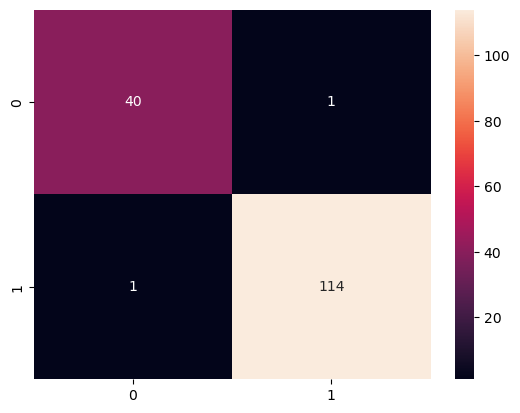

In [186]:
confusion_matrix=tf.math.confusion_matrix(labels=xtrain,predictions=pred)
sns.heatmap(confusion_matrix,annot=True,fmt='d')